# Final Project 1

Developed by :
- Kevin Anggara Putra
- Daniel Leksono
- Ines Savitri

## Data Overview: 
[Reference : Uber and Lyft Dataset Boston, MA]

- id : Unique identifier for each column
- timestamp : Unix timestamp
- hour : Hour of the day
- day : Day of the week
- month : Month in a year
- datetime : Date value
- timezone : Timezone
- source : Initial source of the ride
- destination : Destination of the ride
- cab_type : The type of cab
- price : Price of the ride
- distance : Total distance of the requested ride
- surge_multiplier : Times of the normal price
- temperature : Temperature of the ride
- apparentTemperature : Apparent temperatur of the ride
- summary : Weather report summary of the day
- humidity : Humidity of the ride
- windSpeed : Wind speed of the ride
- windGust : Wind gust of the ride
- uvIndex : UV index of the ride

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Download Datasets
df = pd.read_csv('rideshare_kaggle.csv')

df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


From the output we have 5 rows and 57 columns in ridershare datasets

## Data Preprocessing

- Dealing with missing value

#### Fill Missing Value

In [3]:
# Fill Missing Values
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

From the output we have missing value in column 'price', so we must fill the Null values

In [4]:
# Fill NULL values
df['price'].fillna(df['price'].median(), inplace=True)
df['price']

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
693066    13.0
693067     9.5
693068    13.5
693069    27.0
693070    10.0
Name: price, Length: 693071, dtype: float64

In [5]:
# Check NULL values
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [6]:
After we filter the Null values, now there are no more null values in datasets

SyntaxError: invalid syntax (3538391572.py, line 1)

In [7]:
# Check the unique value data column
for col in df.columns :
  print(col, 'Unique Value')
  print(df[col].unique())
  print('-'*100)

id Unique Value
['424553bb-7174-41ea-aeb4-fe06d4f4b9d7'
 '4bd23055-6827-41c6-b23b-3c491f24e74d'
 '981a3613-77af-4620-a42a-0c0866077d1e' ...
 '64d451d0-639f-47a4-9b7c-6fd92fbd264f'
 '727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e'
 'e7fdc087-fe86-40a5-a3c3-3b2a8badcbda']
----------------------------------------------------------------------------------------------------
timestamp Unique Value
[1.54495261e+09 1.54328402e+09 1.54336682e+09 ... 1.54377528e+09
 1.54507051e+09 1.54473900e+09]
----------------------------------------------------------------------------------------------------
hour Unique Value
[ 9  2  1  4  3 18  5 19  6 10 16 22 23  0 14 11  7 20 13  8 12 21 17 15]
----------------------------------------------------------------------------------------------------
day Unique Value
[16 27 28 30 29 17 26  2  3 13 14  1 18 15  4 10  9]
----------------------------------------------------------------------------------------------------
month Unique Value
[12 11]
--------------------------

[0.     0.1299 0.0246 0.0624 0.0567 0.0036 0.007  0.1088 0.0341 0.0308
 0.0094 0.0013 0.0053 0.002  0.1264 0.0216 0.005  0.008  0.0288 0.0488
 0.0074 0.0017 0.0023 0.0274 0.0015 0.0031 0.0923 0.092  0.0187 0.0006
 0.1267 0.1289 0.0005 0.0016 0.0003 0.0024 0.1058 0.0255 0.0021 0.0121
 0.0071 0.1447 0.0813 0.0674 0.0342 0.0025 0.0012 0.0801 0.0049 0.0772
 0.0737 0.001  0.0591 0.0089 0.0002 0.0832 0.0462 0.0057 0.0701 0.0786
 0.0092 0.0009 0.1044]
----------------------------------------------------------------------------------------------------
precipProbability Unique Value
[0.   1.   0.94 0.29 0.61 0.66 0.02 0.57 0.1  0.46 0.59 0.32 0.86 0.11
 0.16 0.42 0.09 0.03 0.47 0.15 0.74 0.56 0.17 0.14 0.18 0.12 0.85 0.07
 0.99]
----------------------------------------------------------------------------------------------------
humidity Unique Value
[0.68 0.94 0.75 0.73 0.7  0.84 0.91 0.93 0.96 0.62 0.63 0.6  0.66 0.56
 0.86 0.64 0.52 0.69 0.72 0.51 0.67 0.57 0.89 0.92 0.53 0.77 0.65 0.88
 0.54

[32.7  41.83 31.1  26.64 28.61 34.41 39.54 48.02 44.5  43.52 27.99 29.72
 27.31 10.87 18.66 37.56 20.53 26.83 27.53 30.94 34.56  9.22 27.27 35.13
 39.47 31.96 31.67 43.32 31.63 30.89 47.81 40.83 46.13 29.78 36.81 28.31
 28.08 35.8  26.84 22.79 43.75 28.39 32.52 33.96 44.71 28.91 26.45 41.5
 31.68 27.12 45.86 39.51 46.76 29.86 41.98 47.14 19.51  9.15 29.27 44.19
 29.57 29.33  9.85 27.14 46.7  26.98 50.67 35.31 27.26 48.54 44.89 28.96
 31.61  9.98 31.95 27.2  28.36  7.06 36.14 27.29  8.55 35.26 28.63 28.1
 43.94 37.03 26.99 29.42 44.36 36.27 31.82 10.7  39.17 13.07 15.74 34.28
 32.42 45.78  6.46 27.65 29.05 34.39 27.87 26.59 44.14 49.27 31.05 27.51
  9.69 27.86 22.07 42.99 42.14 23.09 32.99 41.99  6.89 33.41 10.29 32.91
 39.68 32.06 26.27 41.58 39.06 33.58 14.76 33.71 27.9  29.17 28.43 29.13
 30.3  31.81 30.32 28.42 25.09 27.35 37.83 33.19 35.04 44.22 26.77 43.33
 47.06 31.27 31.36 31.55 33.78 37.36 34.94 16.42 35.48 39.3   8.68 26.11
 40.38 31.21 38.14 34.67 33.05 34.98 46.56 22.45 26.8

#### Explore Data

In [8]:
# Check the top 5 dataset
df.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [9]:
# Check the bottom 5 dataset
df.tail(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [10]:
# Prepare Dataset
#Select the required column for analysis
data = df[['day', 'month', 'datetime', 'source', 'destination', 'cab_type', 'name', 'price', 'distance','surge_multiplier']]
data.head(10)

,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier
0,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0
5,17,12,2018-12-17 18:25:12,Haymarket Square,North Station,Lyft,Lux Black,16.5,0.44,1.0
6,26,11,2018-11-26 05:03:00,Back Bay,Northeastern University,Lyft,Lyft XL,10.5,1.08,1.0
7,2,12,2018-12-02 19:53:04,Back Bay,Northeastern University,Lyft,Lux Black,16.5,1.08,1.0
8,3,12,2018-12-03 06:28:02,Back Bay,Northeastern University,Lyft,Shared,3.0,1.08,1.0
9,27,11,2018-11-27 10:45:22,Back Bay,Northeastern University,Lyft,Lux Black XL,27.5,1.08,1.0


In [11]:
# add coloumn year, month, date, fetched from 'datetime' column, then remove 'datetime' column
data['datetime'] = pd.to_datetime(data['datetime'])
data['year'] = data['datetime'].dt.year
data.drop('datetime',inplace=True, axis=1)

In [12]:
data.head(10)

,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,year
0,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,2018
1,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,2018
2,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,2018
3,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,2018
4,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,2018
5,17,12,Haymarket Square,North Station,Lyft,Lux Black,16.5,0.44,1.0,2018
6,26,11,Back Bay,Northeastern University,Lyft,Lyft XL,10.5,1.08,1.0,2018
7,2,12,Back Bay,Northeastern University,Lyft,Lux Black,16.5,1.08,1.0,2018
8,3,12,Back Bay,Northeastern University,Lyft,Shared,3.0,1.08,1.0,2018
9,27,11,Back Bay,Northeastern University,Lyft,Lux Black XL,27.5,1.08,1.0,2018


In [12]:
# Move column 'price' to first column in the dataframe.
#data1 = data[[0,1,9,2,3,4,5,6,7,8]]
#data1

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   day               693071 non-null  int64  
 1   month             693071 non-null  int64  
 2   source            693071 non-null  object 
 3   destination       693071 non-null  object 
 4   cab_type          693071 non-null  object 
 5   name              693071 non-null  object 
 6   price             693071 non-null  float64
 7   distance          693071 non-null  float64
 8   surge_multiplier  693071 non-null  float64
 9   year              693071 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 52.9+ MB


From the output we have 9 column to the next analysis

In [14]:
# Scaling Data
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.model_selection import train_test_split
#from sklearn.svm import SVC
#from sklearn.datasets import data

# load data
#data
#print(data)

# split data training and testing
#X_train, X_test, y_train, y_test = train_test_split(data, data.target, test_size=0.2, random_state=42)


In [ ]:
# Data distribution and visualization

In [15]:
data['price'].describe()

count    693071.000000
mean         16.303056
std           8.983913
min           2.500000
25%           9.500000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

In [16]:
data['distance'].describe()

count    693071.000000
mean          2.189430
std           1.138937
min           0.020000
25%           1.280000
50%           2.160000
75%           2.920000
max           7.860000
Name: distance, dtype: float64

In [17]:
data['cab_type'].describe()

count     693071
unique         2
top         Uber
freq      385663
Name: cab_type, dtype: object

In [18]:
data['name'].describe

<bound method NDFrame.describe of 0               Shared
1                  Lux
2                 Lyft
3         Lux Black XL
4              Lyft XL
              ...     
693066          UberXL
693067           UberX
693068            Taxi
693069       Black SUV
693070        UberPool
Name: name, Length: 693071, dtype: object>

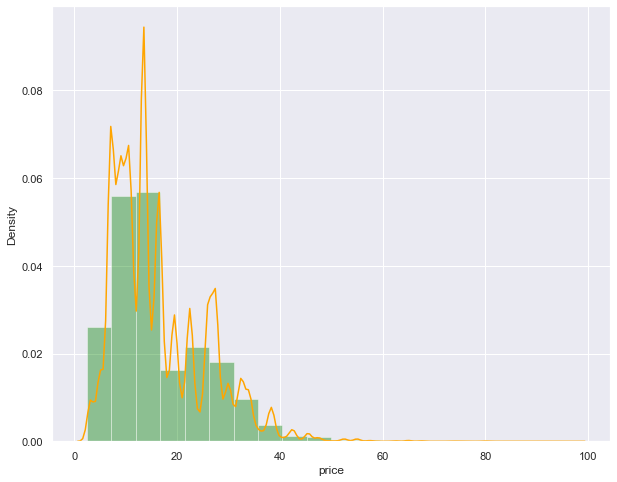

In [19]:
# Show the distribution of price
plt.figure(figsize=(10, 8))
sns.distplot(df['price'], color='green', bins=20, hist_kws={'alpha': 0.4}, kde_kws={"color": "orange"})
plt.show()

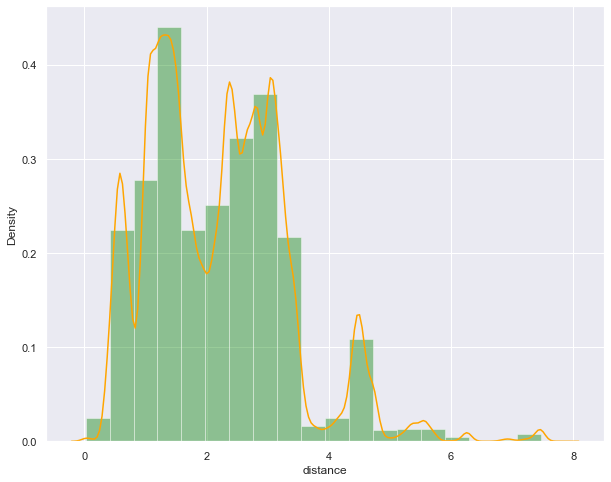

In [20]:
# Show the distribution of distance
plt.figure(figsize=(10, 8))
sns.distplot(df['distance'], color='green', bins=20, hist_kws={'alpha': 0.4}, kde_kws={"color": "orange"})
plt.show()

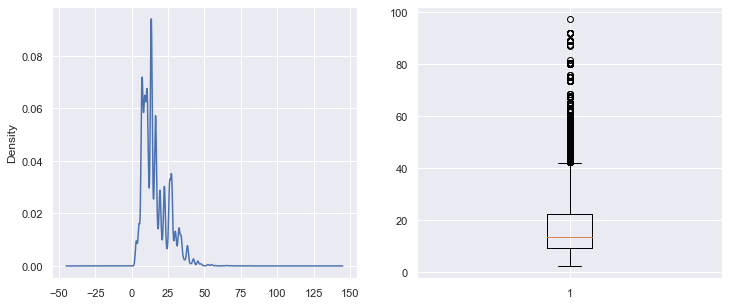

In [21]:
# Univariate analysis price

f = plt.figure(figsize=(12, 5))

f.add_subplot(1,2,1)
data['price'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data['price'])
plt.show()

This plot refer to the normal distribution

Text(0.5, 1.0, 'Distribusi PRICE')

<Figure size 720x360 with 0 Axes>

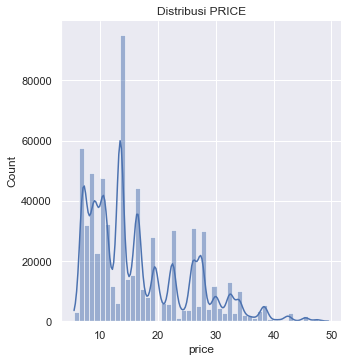

In [22]:
# Distribusi Price
data = data[(data['price']>5.0) & (data['price']<=50.0)]
plt.figure(figsize=(10,5))
sns.displot(data['price'], kde=True, bins=50)
plt.title('Distribusi PRICE')

In [21]:
data['price'].mean()

16.63325909769602

In [22]:
data['price'].median()

13.5

In [23]:
data['price'].mode()

0    13.5
Name: price, dtype: float64

In [24]:
# Ukuran Persebaran Data
import scipy.stats
print('Range: ', np.ptp(data['price']))
print('Variance: ', np.var(data['price']))
print('Standar Deviation: ', np.std(data['price']))
print('Skewness: ', scipy.stats.skew(data['price']))

Range:  44.0
Variance:  72.70954920669774
Standar Deviation:  8.5269894574051
Skewness:  0.9832554760610913


#### From the output we know, the column price indicate the normal distribution, and have the max price is 97.5, the min price is 2.5 , and the mean is 16,63.

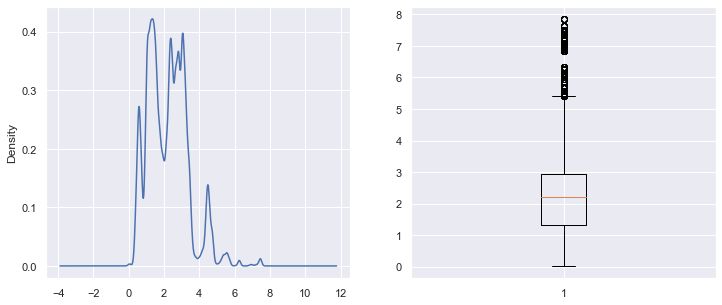

In [25]:
# Univariate analysis distance

a = plt.figure(figsize=(12, 5))

a.add_subplot(1,2,1)
data['distance'].plot(kind='kde')
a.add_subplot(1,2,2)
plt.boxplot(data['distance'])
plt.show()

Text(0.5, 1.0, 'Distribusi distance')

<Figure size 720x360 with 0 Axes>

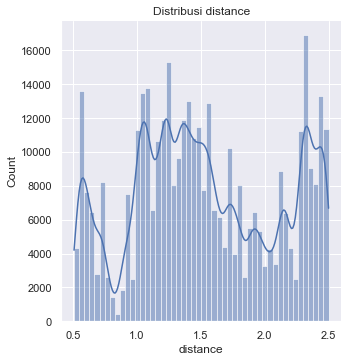

In [26]:
# Distribusi Distance
data = data[(data['distance']>0.50) & (data['distance']<=2.50)]
plt.figure(figsize=(10,5))
sns.displot(data['distance'], kde=True, bins=50)
plt.title('Distribusi distance')

In [27]:
data['distance'].mean()

1.535857121647402

In [28]:
data['distance'].median()

1.46

In [29]:
data['distance'].mode()

0    2.32
Name: distance, dtype: float64

In [30]:
# Ukuran Persebaran Data
import scipy.stats
print('Range: ', np.ptp(data['distance']))
print('Variance: ', np.var(data['distance']))
print('Standar Deviation: ', np.std(data['distance']))
print('Skewness: ', scipy.stats.skew(data['distance']))

Range:  1.99
Variance:  0.3230594097616228
Standar Deviation:  0.5683831540093556
Skewness:  0.09307825718307021


#### From the output we know, the column 'distance' indicate the normal distribution, and have the max distance is 7.86, the min distance 0.02 , and the mean is 1.53.

In [26]:
# Confidence Interval of Price
from scipy.stats import t
x = data['price']

mean = x.mean()
std = x.std()
dof = len(x)-1  #degree of freedom, yaitu penentuan nilai statistik ujinya

confidance = 0.95 # tingkat kepercayaan
t_test = np.abs(t.ppf((1-confidance)/2, dof))

values = np.round((mean-std*t_test/np.sqrt(len(x)), mean+std*t_test/np.sqrt(len(x))),2)

print(values)

[16.61 16.65]


##### From the output we know the mean of price is 16.61 till 16.65, with a confidence level 0.95 or 95%.

In [28]:
# Confidence Interval of Distance
from scipy.stats import t
x = data['distance']

mean = x.mean()
std = x.std()
dof = len(x)-1  #degree of freedom, yaitu penentuan nilai statistik ujinya

confidance = 0.95 # tingkat kepercayaan
t_test = np.abs(t.ppf((1-confidance)/2, dof))

values = np.round((mean-std*t_test/np.sqrt(len(x)), mean+std*t_test/np.sqrt(len(x))),2)

print(values)

[2.21 2.22]


### Algoritma

#### Linear Regression

Linear Regression is

In [32]:
# Make a new variable for Linear Regression analysis
data1 = df[['price', 'distance']]
data1

,price,distance
0,5.0,0.44
1,11.0,0.44
2,7.0,0.44
3,26.0,0.44
4,9.0,0.44
...,...,...
693066,13.0,1.00
693067,9.5,1.00
693068,13.5,1.00
693069,27.0,1.00


In [33]:
data1.corr()

,price,distance
price,1.000000,0.328601
distance,0.328601,1.000000


From the output we know the correlation between price and distance is positive but low correlation

In [34]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# variabel x and y
X = df['distance'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [35]:
# Slacing data for Training Set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)

In [36]:
# Fitting Simple Linear Regression for Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
# Prediction Set test
y_pred = regressor.predict(X_test)

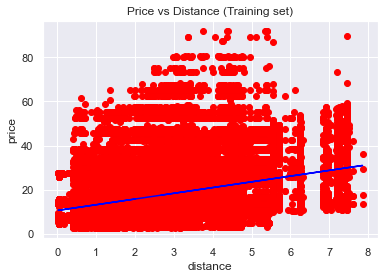

In [38]:
# Visualisasi hasil Training Set
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Price vs Distance (Training set)')
plt.xlabel('distance')
plt.ylabel('price')
plt.show()

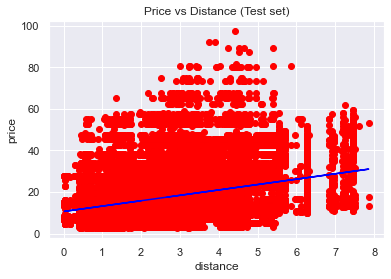

In [39]:
# Visualisasi hasil Test Set
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Price vs Distance (Test set)')
plt.xlabel('distance')
plt.ylabel('price')
plt.show()

### Decision Tree

Decision Tree 

In [40]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [41]:
# make a new variabel data for Decision tree analysis
data2 = df[['month','cab_type','name','surge_multiplier']]
data2

,month,cab_type,name,surge_multiplier
0,12,Lyft,Shared,1.0
1,11,Lyft,Lux,1.0
2,11,Lyft,Lyft,1.0
3,11,Lyft,Lux Black XL,1.0
4,11,Lyft,Lyft XL,1.0
...,...,...,...,...
693066,12,Uber,UberXL,1.0
693067,12,Uber,UberX,1.0
693068,12,Uber,Taxi,1.0
693069,12,Uber,Black SUV,1.0


In [42]:
# Change string value to numerik value from cab_type dan name column
d = {'Lyft': 1, 'Uber':2}
data2['cab_type'] = df['cab_type'].map(d)
d = {'Shared':1, 'Lux':2, 'Lyft':3, 'Lux Black XL':4, 'Lyft XL':5, 'Lux Black':6, 'Uber XL':7,
     'Black':8, 'UberX':9, 'WAV':10, 'Black SUV':11, 'UberPool':12, 'Taxi':13}
data2['name'] = df['name'].map(d)

print(data2)

        month  cab_type  name  surge_multiplier
0          12         1   1.0               1.0
1          11         1   2.0               1.0
2          11         1   3.0               1.0
3          11         1   4.0               1.0
4          11         1   5.0               1.0
...       ...       ...   ...               ...
693066     12         2   NaN               1.0
693067     12         2   9.0               1.0
693068     12         2  13.0               1.0
693069     12         2  11.0               1.0
693070     12         2  12.0               1.0

[693071 rows x 4 columns]


In [43]:
# Check unique value
for col in data2.columns :
  print(col, 'Unique Value')
  print(data2[col].unique())
  print('-'*100)

month Unique Value
[12 11]
----------------------------------------------------------------------------------------------------
cab_type Unique Value
[1 2]
----------------------------------------------------------------------------------------------------
name Unique Value
[ 1.  2.  3.  4.  5.  6. nan  8.  9. 10. 11. 12. 13.]
----------------------------------------------------------------------------------------------------
surge_multiplier Unique Value
[1.   1.25 2.5  2.   1.75 1.5  3.  ]
----------------------------------------------------------------------------------------------------


In [44]:
# Cheeck missing value
data2.isnull().sum()

month                   0
cab_type                0
name                55096
surge_multiplier        0
dtype: int64

In [45]:
# Fill NULL values
data2['name'].fillna(data2['name'].median(), inplace=True)
data2['name']

0          1.0
1          2.0
2          3.0
3          4.0
4          5.0
          ... 
693066     8.0
693067     9.0
693068    13.0
693069    11.0
693070    12.0
Name: name, Length: 693071, dtype: float64

In [46]:
data2.isnull().sum()

month               0
cab_type            0
name                0
surge_multiplier    0
dtype: int64

In [47]:
# After cleaning data we must put the fiture column and target column
# Kolom fitur adalah kolom yang kita coba prediksi dan kolom target adalah kolom dengan nilai yang kita coba prediski

# X adalah kolom fitur dan y adalah kolom target
features = ['month','surge_multiplier','name']

X = data2[features]
y = data2['cab_type']

print(X)
print(y)

        month  surge_multiplier  name
0          12               1.0   1.0
1          11               1.0   2.0
2          11               1.0   3.0
3          11               1.0   4.0
4          11               1.0   5.0
...       ...               ...   ...
693066     12               1.0   8.0
693067     12               1.0   9.0
693068     12               1.0  13.0
693069     12               1.0  11.0
693070     12               1.0  12.0

[693071 rows x 3 columns]
0         1
1         1
2         1
3         1
4         1
         ..
693066    2
693067    2
693068    2
693069    2
693070    2
Name: cab_type, Length: 693071, dtype: int64


In [48]:
from sklearn.tree import DecisionTreeClassifier
dtree = tree.DecisionTreeClassifier()

In [49]:
# Memanggil data
dtree = dtree.fit(X, y)

In [50]:
print(dtree.predict([[11, 1.25, 5]]))

print("[1] means 'Lyft'")
print("[2] means 'Uber'")

[1]
[1] means 'Lyft'
[2] means 'Uber'


In [51]:
print(dtree.predict([[11, 1.25, 9]]))

[2]
